In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
# 데이터 불러오기
boston = pd.read_csv('./data/Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [10]:
boston_data = boston.drop(['Target'], axis=1)
target = boston[['Target']]
boston_data.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0


**CRIM, RM, LSTAT 세 개의 변수를 통해 다중회귀적합**

In [6]:
## boston data에서 CRIM, RM, LSTAT 변수만 뽑아오기
x_data = boston[['CRIM', 'RM', 'LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [7]:
# 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant='add')
x_data1.head()

,const,CRIM,RM,LSTAT
0,1.0,0.00632,6.575,4.98
1,1.0,0.02731,6.421,9.14
2,1.0,0.02729,7.185,4.03
3,1.0,0.03237,6.998,2.94
4,1.0,0.06905,7.147,5.33


In [11]:
# 회귀모델 적합
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [12]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          1.01e-112
Time:                        21:52:05   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
"""
< 단순선형회귀모델와 다중선형회귀모델의 회귀계수 비교>
- 단순선형회귀모델의 각 회귀계수와 Y에 대한 X의 변동성비율
CRIM : -0.4151(coef), 15%(R-squared)
RM : 9.1021(coef), 48%(R-squared)
LSTAT : -0.9500(coef), 54%(R-squared)

- 다중선형회귀모델의 회귀계수와 Y에 대한 X의 변동성비율
CRIM : -0.1029(coef)
RM : 5.2170(coef)
LSTAT : -0.5785(coef)
다중일 경우: 64%(R-squared)

- 다중선형회귀모델에서 회귀계수와 변동성비율이 줄어든 이유
: Y의 변동성에 대한 CRIM, RM, LSTAT 변수 각각에 대한 변동성 비율의 합이 100%를 초과하기 때문에 영향력이 중복되는 부분이 있고, 
그래서 각 변수에 대한 회귀계수도 그만큼 감소함
"""

'\n< 단순선형회귀모델와 다중선형회귀모델의 회귀계수 비교>\n- 단순선형회귀모델의 각 회귀계수와 Y에 대한 X의 변동성비율\nCRIM : -0.4151(coef), 15%(R-squared)\nRM : 9.1021(coef), 48%(R-squared)\nLSTAT : -0.9500(coef), 54%(R-squared)\n\n- 다중선형회귀모델의 회귀계수와 Y에 대한 X의 변동성비율\nCRIM : -0.1029(coef)\nRM : 5.2170(coef)\nLSTAT : -0.5785(coef)\n다중일 경우: 64%(R-squared)\n\n다중선형회귀모델에서 회귀계수와 변동성비율이 줄어든 이유\n: Y의 변동성에 대한 CRIM, RM, LSTAT 변수 각각에 대한 변동성 비율의 합이 100%를 초과하기 때문에 영향력이 중복되는 부분이 있고, \n그래서 회귀계수도 그만큼 감소함\n'

**행렬연산을 통해 beta 구하기**

In [20]:
from numpy import linalg # 행렬연산을 통해 beta구하기 
# beta = inverse(X_t*X)*X_t*Y

beta = np.dot(np.dot(linalg.inv(np.dot(x_data1.T, x_data1)),x_data1.T),target)
beta

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

**y_hat 구하기**

In [23]:
pred = fitted_multi_model.predict(x_data1)

**residual plot**

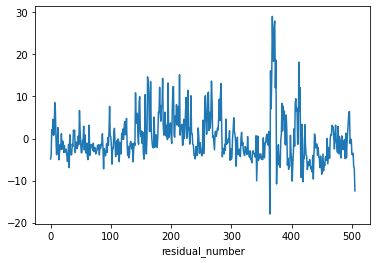

In [24]:
import matplotlib.pyplot as plt

fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

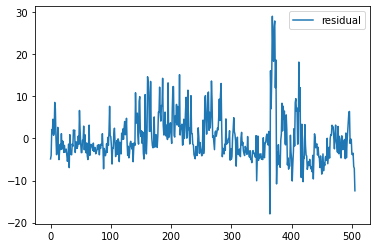

In [28]:
fitted_multi_model.resid.plot(label="residual")
plt.legend()

In [31]:
np.sum(fitted_multi_model.resid)
# 잔차의 합은 0에 근사함

-5.5706550483591855e-12